In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [2]:
loandata = pd.read_csv('F:\Analytix_Labs\Python for data science\Case_Study\Basic Statistics - Hypothesis Testing\LoansData.csv')
print(loandata)

      Amount.Requested  Amount.Funded.By.Investors Interest.Rate Loan.Length  \
0              20000.0                    20000.00         8.90%   36 months   
1              19200.0                    19200.00        12.12%   36 months   
2              35000.0                    35000.00        21.98%   60 months   
3              10000.0                     9975.00         9.99%   36 months   
4              12000.0                    12000.00        11.71%   36 months   
...                ...                         ...           ...         ...   
2495           30000.0                    29950.00        16.77%   60 months   
2496           16000.0                    16000.00        14.09%   60 months   
2497           10000.0                    10000.00        13.99%   36 months   
2498            6000.0                     6000.00        12.42%   36 months   
2499            9000.0                     5242.75        13.79%   36 months   

            Loan.Purpose Debt.To.Income

In [2]:
films=pd.read_csv('F:\Analytix_Labs\Python for data science\Case_Study\Basic Statistics - Hypothesis Testing\Films.csv')
print(films)

     _rowstate_                    Movie  Gender Marital_Status  Sinage  \
0             0  Ferris Buellers Day Off  Female        Married     2.0   
1             0  Ferris Buellers Day Off  Female         Single     1.0   
2             0  Ferris Buellers Day Off    Male        Married     2.0   
3             0  Ferris Buellers Day Off  Female        Married     1.0   
4             0  Ferris Buellers Day Off  Female        Married     1.0   
..          ...                      ...     ...            ...     ...   
325           0               Old School       2              2     1.0   
326           0               Old School       1              1     2.0   
327           0               Old School       2              1     2.0   
328           0               Old School       1              1     1.0   
329           0               Old School       2              2     2.0   

     Parking  Clean  Overall  Age  Income Hear_About  
0        2.0    2.0      2.0  3.0     1.0   

In [4]:
price_quotes=pd.read_csv('F:\Analytix_Labs\Python for data science\Case_Study\Basic Statistics - Hypothesis Testing\Price_Quotes.csv')
price_quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [5]:
Priority_Assessment= pd.read_csv('F:\Analytix_Labs\Python for data science\Case_Study\Basic Statistics - Hypothesis Testing\Priority_Assessment.csv')
print(Priority_Assessment)

     Days Priority
0     3.3     High
1     7.9   Medium
2     0.3     High
3     0.7   Medium
4     8.6   Medium
..    ...      ...
637   2.5      Low
638   0.3     High
639   0.3   Medium
640   1.3   Medium
641   0.5     High

[642 rows x 2 columns]


In [6]:
Treatment_Facility=pd.read_csv('F:\Analytix_Labs\Python for data science\Case_Study\Basic Statistics - Hypothesis Testing\Treatment_Facility.csv')
print(Treatment_Facility)

    Month Reengineer  Employee_Turnover       VAR4        VAR5
0       1      Prior             0.0000  24.390244   42.682927
1       2      Prior             6.0606  19.354839   25.806452
2       3      Prior            12.1212  35.087719  146.198830
3       4      Prior             3.3333  18.404908  110.429448
4       5      Prior            12.9032  17.964072   23.952096
5       6      Prior             9.6774  41.176471   47.058824
6       7      Prior            11.7647  13.422819    0.000000
7       8      Prior            11.4286  31.250000   25.000000
8       9      Prior            23.0769  17.241379  132.183908
9      10      Prior            15.0000  16.574586   16.574586
10     11      Prior            10.0000   5.917160   88.757396
11     12      Prior            26.0870  21.164021   31.746032
12     13      Prior            11.1111   5.076142   10.152284
13     14       Post            26.6667   9.708738   29.126214
14     15       Post            17.9487   4.201681   21

### BUSINESS PROBLEM-1: 

In [7]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [8]:
##a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan
##amounts)

In [9]:
loandata.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [10]:
H0 - Intrest rate is not varied
Ha - Intrest rate is varied

CI - 95%
p - 0.05

SyntaxError: invalid syntax (<ipython-input-10-aeaef160559b>, line 1)

In [10]:
loandata.rename(columns = {'Amount.Requested':'Amount_Requested','Amount.Funded.By.Investors':'Amount_Funded_By_Investors',
'Interest.Rate':'Interest_Rate','Loan.Length':'Loan_Length','Loan.Purpose':'Loan_Purpose','Debt.To.Income.Ratio':'Debt_To_Income_Ratio',
'Home.Ownership':'Home_Ownership','Monthly.Income':'Monthly_Income','FICO.Range':'FICO_Range','Open.CREDIT.Lines':'Open_CREDIT_Lines',
'Revolving.CREDIT.Balance':'Revolving_CREDIT_Balance','Inquiries.in.the.Last.6.Months':'Inquiries_in_the_Last_6_Months',
'Employment.Length':'Employment_Length'},inplace = True)

In [11]:
loandata.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [12]:
loandata.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [13]:
loandata.isnull().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

In [14]:
loandata=loandata.dropna(axis = 0, how ='any')

In [15]:
loandata['Amount_Requested'] = loandata['Amount_Requested'].astype(int)

In [16]:
loandata['Interest_Rate'] = loandata['Interest_Rate'].str.replace('%','')

In [17]:
loandata.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000,20000.0,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200,19200.0,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000,35000.0,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000,9975.0,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000,12000.0,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [18]:
loandata.dtypes

Amount_Requested                    int32
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [19]:
loandata['Interest_Rate'] = loandata['Interest_Rate'].astype(float)

In [20]:
loandata.dtypes

Amount_Requested                    int32
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [21]:
loandata.dtypes

Amount_Requested                    int32
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [22]:
stats.ttest_rel(loandata.Amount_Requested,loandata.Interest_Rate)

Ttest_relResult(statistic=78.76236033975526, pvalue=0.0)

In [ ]:
we reject the null hypothesis, intrest rate is varied

In [ ]:
#b. Loan length is directly effecting intrest rate.

In [23]:
loandata.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000,20000.0,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200,19200.0,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000,35000.0,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000,9975.0,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000,12000.0,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [24]:
loandata['Loan_Length'] = loandata['Loan_Length'].str.replace('months','')

In [25]:
loandata.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000,20000.0,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200,19200.0,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000,35000.0,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000,9975.0,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000,12000.0,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [26]:
loandata.dtypes

Amount_Requested                    int32
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [27]:
loandata['Loan_Length'] = loandata['Loan_Length'].astype(int)

In [28]:
loandata['Loan_Purpose'] = loandata['Loan_Purpose'].astype('str')

In [29]:
loandata.dtypes

Amount_Requested                    int32
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int32
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [ ]:
H0 - Loan length is not affecting intrest rate
Ha- Loan length is affecting intrest rate

In [30]:
stats.pearsonr(loandata.Interest_Rate,loandata.Loan_Length)

(0.42505738230947654, 1.7938010673370282e-106)

In [ ]:
reject the h0 null hypothesis

In [ ]:
#c. Inrest rate varies for different purpose of loans

In [ ]:
H0- Intrest rate is not varied
Ha- intrest rate varied for purpose of loans
CI - 95%
p - 0.05

In [31]:
loandata.head(100)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000,20000.0,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200,19200.0,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000,35000.0,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000,9975.0,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000,12000.0,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,12000,12000.0,11.14,36,debt_consolidation,2.37%,MD,MORTGAGE,12500.00,735-739,13.0,10944.0,0.0,5 years
98,10375,10375.0,19.72,36,debt_consolidation,4.99%,CT,RENT,4166.67,665-669,9.0,6122.0,1.0,5 years
99,4800,4800.0,18.75,36,other,10.89%,NM,MORTGAGE,5833.33,670-674,8.0,17943.0,0.0,10+ years
100,6400,6400.0,13.11,36,credit_card,11.46%,LA,MORTGAGE,4666.67,700-704,7.0,8942.0,1.0,10+ years


In [32]:
loandata.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

In [33]:
loandata['Loan_Purpose']=loandata['Loan_Purpose'].astype('category')

In [34]:
loandata.dtypes

Amount_Requested                     int32
Amount_Funded_By_Investors         float64
Interest_Rate                      float64
Loan_Length                          int32
Loan_Purpose                      category
Debt_To_Income_Ratio                object
State                               object
Home_Ownership                      object
Monthly_Income                     float64
FICO_Range                          object
Open_CREDIT_Lines                  float64
Revolving_CREDIT_Balance           float64
Inquiries_in_the_Last_6_Months     float64
Employment_Length                   object
dtype: object

In [35]:
stats.spearmanr(loandata.Loan_Purpose,loandata.Interest_Rate)

SpearmanrResult(correlation=-0.05369361470239015, pvalue=0.008337443233367109)

In [ ]:
Reject the H0 the null hypothesis

In [ ]:
#d. There is relationship between FICO scores and Home Ownership. It means that, People
#with owning home will have high FICO scores.

In [36]:
loandata.head(100)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000,20000.0,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200,19200.0,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000,35000.0,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000,9975.0,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000,12000.0,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,12000,12000.0,11.14,36,debt_consolidation,2.37%,MD,MORTGAGE,12500.00,735-739,13.0,10944.0,0.0,5 years
98,10375,10375.0,19.72,36,debt_consolidation,4.99%,CT,RENT,4166.67,665-669,9.0,6122.0,1.0,5 years
99,4800,4800.0,18.75,36,other,10.89%,NM,MORTGAGE,5833.33,670-674,8.0,17943.0,0.0,10+ years
100,6400,6400.0,13.11,36,credit_card,11.46%,LA,MORTGAGE,4666.67,700-704,7.0,8942.0,1.0,10+ years


In [37]:
loandata.dtypes

Amount_Requested                     int32
Amount_Funded_By_Investors         float64
Interest_Rate                      float64
Loan_Length                          int32
Loan_Purpose                      category
Debt_To_Income_Ratio                object
State                               object
Home_Ownership                      object
Monthly_Income                     float64
FICO_Range                          object
Open_CREDIT_Lines                  float64
Revolving_CREDIT_Balance           float64
Inquiries_in_the_Last_6_Months     float64
Employment_Length                   object
dtype: object

In [38]:
loandata['FICO_Range']=loandata['FICO_Range'].astype('string')

In [39]:
loandata['FICO_Range']=loandata['FICO_Range'].astype('category')

In [40]:
loandata['Home_Ownership']=loandata['Home_Ownership'].astype('category')

In [41]:
loandata.dtypes

Amount_Requested                     int32
Amount_Funded_By_Investors         float64
Interest_Rate                      float64
Loan_Length                          int32
Loan_Purpose                      category
Debt_To_Income_Ratio                object
State                               object
Home_Ownership                    category
Monthly_Income                     float64
FICO_Range                        category
Open_CREDIT_Lines                  float64
Revolving_CREDIT_Balance           float64
Inquiries_in_the_Last_6_Months     float64
Employment_Length                   object
dtype: object

In [ ]:
H0 - There is realtionship between the variables
Ha- There is no realtionship between the variables

In [ ]:
CI - 95%
p - 0.05

In [42]:
obs_freq = pd.crosstab( loandata.FICO_Range,loandata.Home_Ownership)
print(obs_freq)

Home_Ownership  MORTGAGE  OTHER  OWN  RENT
FICO_Range                                
640-644                0      0    1     4
645-649                1      0    0     2
650-654                1      0    0     0
655-659                0      1    0     3
660-664               40      0   14    64
665-669               52      0   17    69
670-674               66      1   13    87
675-679               78      1   10    72
680-684               55      2    9    91
685-689               58      0   10    60
690-694               52      0    9    74
695-699               64      0   10    72
700-704               57      0   10    57
705-709               65      0   12    54
710-714               52      0   10    45
715-719               45      0    2    45
720-724               46      0    0    62
725-729               45      0    5    41
730-734               46      0    7    41
735-739               30      0    6    29
740-744               24      0    4    22
745-749    

In [43]:
stats.chi2_contingency(obs_freq)

(269.7881202757335,
 3.087547281383599e-15,
 111,
 array([[2.29796933e+00, 1.03605470e-02, 3.91628678e-01, 2.30004144e+00],
        [1.37878160e+00, 6.21632822e-03, 2.34977207e-01, 1.38002487e+00],
        [4.59593867e-01, 2.07210941e-03, 7.83257356e-02, 4.60008288e-01],
        [1.83837547e+00, 8.28843763e-03, 3.13302942e-01, 1.84003315e+00],
        [5.42320763e+01, 2.44508910e-01, 9.24243680e+00, 5.42809780e+01],
        [6.34239536e+01, 2.85951098e-01, 1.08089515e+01, 6.34811438e+01],
        [7.67521757e+01, 3.46042271e-01, 1.30803978e+01, 7.68213842e+01],
        [7.39946125e+01, 3.33609615e-01, 1.26104434e+01, 7.40613344e+01],
        [7.21562370e+01, 3.25321177e-01, 1.22971405e+01, 7.22213013e+01],
        [5.88280149e+01, 2.65230004e-01, 1.00256942e+01, 5.88810609e+01],
        [6.20451720e+01, 2.79734770e-01, 1.05739743e+01, 6.21011189e+01],
        [6.71007045e+01, 3.02527973e-01, 1.14355574e+01, 6.71612101e+01],
        [5.69896395e+01, 2.56941567e-01, 9.71239121e+00, 5.704

In [44]:
c, p, dof, expected = chi2_contingency(obs_freq)

In [45]:
p

3.087547281383599e-15

In [70]:
Do not reject the null hypothesis

SyntaxError: invalid syntax (<ipython-input-70-5faba3ceeabd>, line 1)

### BUSINESS PROBLEM-2: 

In [ ]:
##BUSINESS PROBLEM: We would like to assess if there is any difference in the average
#price quotes provided by Mary and Barry. 

In [46]:
price_quotes.dtypes

Order_Number    int64
Barry_Price     int64
Mary_Price      int64
dtype: object

In [47]:
price_quotes.head()

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


In [48]:
price_quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


In [49]:
price_quotes.isnull().sum()

Order_Number    0
Barry_Price     0
Mary_Price      0
dtype: int64

In [ ]:
h0-there is not diffrence in price quotes
ha- there is a diffrence in price quotes

In [ ]:
CI - 95%
p - 0.05

In [50]:
price_quotes.shape[0]

12

In [51]:
stats.ttest_ind(price_quotes.Barry_Price,price_quotes.Mary_Price)

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.17114226132118285)

In [ ]:
Null hypothesis does not hold

In [52]:
print( 'mean Barry:', price_quotes.Barry_Price.mean(), '| mean Mary:', price_quotes.Mary_Price.mean())

mean Barry: 124.33333333333333 | mean Mary: 114.75


In [ ]:
There is a difference

### BUSINESS PROBLEM-3: 

In [7]:
Treatment_Facility.dtypes

Month                  int64
Reengineer            object
Employee_Turnover    float64
VAR4                 float64
VAR5                 float64
dtype: object

In [8]:
Treatment_Facility.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [9]:
Treatment_Facility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   VAR4               20 non-null     float64
 4   VAR5               20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [10]:
Treatment_Facility.isna().sum()

Month                0
Reengineer           0
Employee_Turnover    0
VAR4                 0
VAR5                 0
dtype: int64

In [11]:
Treatment_Facility.rename(columns={'VAR4':'TRFF','VAR5':'CI'},inplace=True)

In [12]:
Treatment_Facility.head()

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [ ]:
h0- Critical incidence rate has not been improved
ha- Critical incidence rate has improved
CI - 95%
p - 0.05

In [13]:
stats.spearmanr(Treatment_Facility.Reengineer,Treatment_Facility.CI)

SpearmanrResult(correlation=0.31814238148788887, pvalue=0.17162678189523084)

In [ ]:
Donot accept the null hypothesis

### BUSINESS PROBLEM-4 

In [7]:
Priority_Assessment.dtypes

Days        float64
Priority     object
dtype: object

In [8]:
Priority_Assessment.head()

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


In [9]:
Priority_Assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [11]:
Priority_Assessment.isnull().sum()

Days        0
Priority    0
dtype: int64

In [ ]:
h0- Jobs are getting not done by system
ha- Jobs are getting done by system
CI - 95%
p - 0.05

In [13]:
obs_freq1 = pd.crosstab( Priority_Assessment.Days,Priority_Assessment.Priority)
print(obs_freq1)

Priority  High  Low  Medium
Days                       
0.1         55    5      29
0.2         49    5      47
0.3         34   12      33
0.4          9    2      11
0.5         11    3       7
...        ...  ...     ...
33.2         0    0       1
34.8         1    0       0
62.7         1    0       0
66.6         1    0       0
72.9         1    0       0

[121 rows x 3 columns]


In [14]:
stats.spearmanr(Priority_Assessment.Days,Priority_Assessment.Priority)

SpearmanrResult(correlation=0.017913791551236326, pvalue=0.6505153120156153)

In [15]:
we fail to reject the null hypothesis

SyntaxError: invalid syntax (<ipython-input-15-e2fe2b3b5949>, line 1)

### BUSINESS PROBLEM-5 

In [3]:
films.dtypes

_rowstate_          int64
Movie              object
Gender             object
Marital_Status     object
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

In [4]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [5]:
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [6]:
films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [7]:
films=films.dropna(axis = 0, how ='any')

In [8]:
films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [9]:
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      301 non-null    int64  
 1   Movie           301 non-null    object 
 2   Gender          301 non-null    object 
 3   Marital_Status  301 non-null    object 
 4   Sinage          301 non-null    float64
 5   Parking         301 non-null    float64
 6   Clean           301 non-null    float64
 7   Overall         301 non-null    float64
 8   Age             301 non-null    float64
 9   Income          301 non-null    float64
 10  Hear_About      301 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.2+ KB


In [10]:
###  What is the overall level of customer satisfaction? 

In [11]:
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [59]:
films['Gender_1'] = np.where(films['Gender'] == "Female", 1, 2)
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About,Gender_1,Marital_Status_1
0,0,Ferris Buellers Day Off,Female,Married,2,2,2,2,3,1,5,1,1
1,0,Ferris Buellers Day Off,Female,Single,1,1,1,1,2,1,5,1,2
2,0,Ferris Buellers Day Off,Male,Married,2,4,3,2,4,1,5,2,1
3,0,Ferris Buellers Day Off,Female,Married,1,3,2,2,4,1,5,1,1
4,0,Ferris Buellers Day Off,Female,Married,1,1,1,1,3,3,1,1,1


In [60]:
films['Marital_Status_1'] = np.where(films['Marital_Status'] == "Married", 1, 2)
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About,Gender_1,Marital_Status_1
0,0,Ferris Buellers Day Off,Female,Married,2,2,2,2,3,1,5,1,1
1,0,Ferris Buellers Day Off,Female,Single,1,1,1,1,2,1,5,1,2
2,0,Ferris Buellers Day Off,Male,Married,2,4,3,2,4,1,5,2,1
3,0,Ferris Buellers Day Off,Female,Married,1,3,2,2,4,1,5,1,1
4,0,Ferris Buellers Day Off,Female,Married,1,1,1,1,3,3,1,1,1


In [18]:
films['Sinage'] = films['Sinage'].astype(int)
films['Parking'] = films['Parking'].astype(int)
films['Clean'] = films['Clean'].astype(int)
films['Overall'] = films['Overall'].astype(int)
films['Age'] = films['Age'].astype(int)
films['Income'] = films['Income'].astype(int)

In [16]:
films.dtypes

_rowstate_           int64
Movie               object
Gender              object
Marital_Status      object
Sinage               int32
Parking              int32
Clean                int32
Overall              int32
Age                  int32
Income               int32
Hear_About          object
Gender_1             int32
Marital_Status_1     int32
dtype: object

In [ ]:
H0- The customer stisfaction is bad
Ha- The customer satisfaction is good
CI - 95%
p - 0.05

In [19]:
obs_freq = pd.crosstab(films.Overall,films.Age)

In [20]:
stats.chi2_contingency(obs_freq)

(11.024837235069565,
 0.5267913370930692,
 12,
 array([[1.00132890e+01, 7.46445183e+01, 4.91561462e+01, 3.18604651e+00],
        [1.08172757e+01, 8.06378738e+01, 5.31029900e+01, 3.44186047e+00],
        [8.77076412e-01, 6.53820598e+00, 4.30564784e+00, 2.79069767e-01],
        [7.30897010e-02, 5.44850498e-01, 3.58803987e-01, 2.32558140e-02],
        [2.19269103e-01, 1.63455150e+00, 1.07641196e+00, 6.97674419e-02]]))

In [21]:
c, p, dof, expected = chi2_contingency(obs_freq)

In [22]:
p

0.5267913370930692

In [ ]:
Reject the null hypothesis

In [ ]:
# What factors are linked to satisfaction?

In [24]:
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About,Gender_1,Marital_Status_1
0,0,Ferris Buellers Day Off,Female,Married,2,2,2,2,3,1,5,1,1
1,0,Ferris Buellers Day Off,Female,Single,1,1,1,1,2,1,5,1,0
2,0,Ferris Buellers Day Off,Male,Married,2,4,3,2,4,1,5,0,1
3,0,Ferris Buellers Day Off,Female,Married,1,3,2,2,4,1,5,1,1
4,0,Ferris Buellers Day Off,Female,Married,1,1,1,1,3,3,1,1,1


In [27]:
H0- The overall sastisfation is not high
Ha- The overall satisfaction is high
CI - 95%
p - 0.05

In [28]:
obs_freq1= pd.crosstab(films.Parking,films.Overall)

In [29]:
stats.chi2_contingency(obs_freq1)

(218.79348282085004,
 1.2264032549812005e-37,
 16,
 array([[5.55282392e+01, 5.99867110e+01, 4.86378738e+00, 4.05315615e-01,
         1.21594684e+00],
        [6.32657807e+01, 6.83455150e+01, 5.54152824e+00, 4.61794020e-01,
         1.38538206e+00],
        [1.31993355e+01, 1.42591362e+01, 1.15614618e+00, 9.63455150e-02,
         2.89036545e-01],
        [3.18604651e+00, 3.44186047e+00, 2.79069767e-01, 2.32558140e-02,
         6.97674419e-02],
        [1.82059801e+00, 1.96677741e+00, 1.59468439e-01, 1.32890365e-02,
         3.98671096e-02]]))

In [30]:
c, p, dof, expected = chi2_contingency(obs_freq1)

In [31]:
p

1.2264032549812005e-37

In [ ]:
Reject the null hypothesis

In [32]:
#What is the demographic profile of Film on the Rocks patrons?

In [33]:
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About,Gender_1,Marital_Status_1
0,0,Ferris Buellers Day Off,Female,Married,2,2,2,2,3,1,5,1,1
1,0,Ferris Buellers Day Off,Female,Single,1,1,1,1,2,1,5,1,0
2,0,Ferris Buellers Day Off,Male,Married,2,4,3,2,4,1,5,0,1
3,0,Ferris Buellers Day Off,Female,Married,1,3,2,2,4,1,5,1,1
4,0,Ferris Buellers Day Off,Female,Married,1,1,1,1,3,3,1,1,1


<AxesSubplot:>

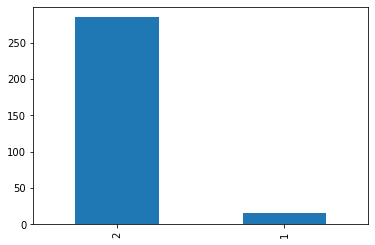

In [61]:
films['Gender_1'].value_counts().plot.bar()
#Female are more than male customers

<AxesSubplot:>

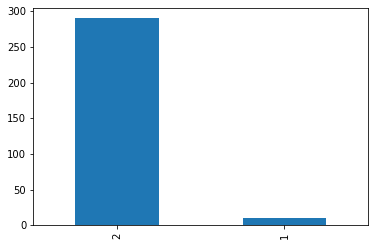

In [57]:
films['Marital_Status_1'].value_counts().plot.bar()
#single people are more than married couples

<AxesSubplot:>

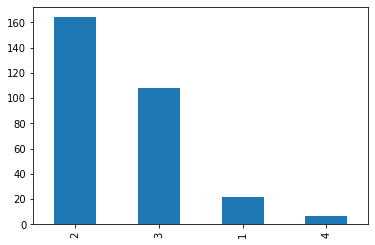

In [53]:
films['Age'].value_counts().plot.bar()
# 13-30 age group is watching more movies than any other age group

<AxesSubplot:>

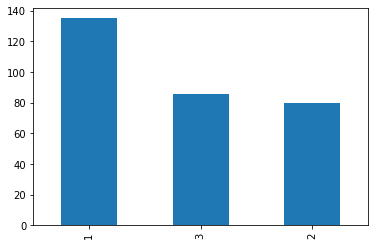

In [54]:
films['Income'].value_counts().plot.bar()
# Income group 1 has more viewers than Group 3 and 2

In [ ]:
#In what media outlet(s) should the film series be advertised?

<AxesSubplot:>

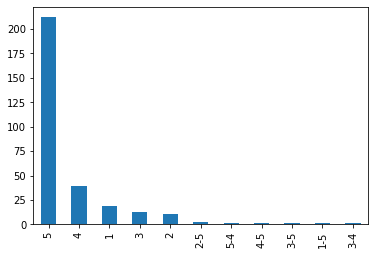

In [55]:
films['Hear_About'].value_counts().plot.bar()

In [ ]:
The film should be advertized on Websites